# Things to do
    - add humidity column
    - add weekday column
    - one hot encoder cbwd and weekday columns
    - fill NaN with not NaN before
    - outliers
    - add past data columns

In [1]:
import pandas as pd
import numpy as np
from math import exp, isnan
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = 15, 10

In [3]:
df = pd.read_csv('data.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


## Add humidity column

In [4]:
def cal(temp, dewp):
    return 100*(exp((17.625*dewp)/(243.04+dewp))/exp((17.625*temp)/(243.04+temp)))
df['hum'] = [cal(temp, dewp) for temp, dewp in zip(df['TEMP'], df['DEWP'])]

## Add weekday column

In [5]:
weekday = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
tmp = []
for i, j, k in zip(df['day'], df['month'], df['year']):
    date = weekday[datetime.strptime(str('{}/{}/{}'.format(i, j, k)), '%d/%m/%Y').weekday()]
    tmp.append(date)
df['weekday'] = tmp

## One Hot Encoder cbwd column

In [6]:
df = pd.get_dummies(df)

## Fill NaN with not NaN before

In [7]:
df['pm2.5'].isna().sum()

2067

In [8]:
df['pm2.5'].fillna(method='ffill', inplace=True)

In [9]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,...,cbwd_NW,cbwd_SE,cbwd_cv,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,...,1,0,0,0,0,0,0,1,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,...,1,0,0,0,0,0,0,1,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,...,1,0,0,0,0,0,0,1,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,...,1,0,0,0,0,0,0,1,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,...,1,0,0,0,0,0,0,0,1,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,...,1,0,0,0,0,0,0,0,1,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,...,1,0,0,0,0,0,0,0,1,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,...,1,0,0,0,0,0,0,0,1,0


## Outliers

In [10]:
dic = {}
for day, month, year, hour, pm25 in zip(df['day'], df['month'], df['year'], df['hour'], df['pm2.5']):
    dic[datetime.strptime(str('{}/{}/{} {}:00'.format(day, month, year, hour)), '%d/%m/%Y %H:%M')] = pm25

In [11]:
outlier_df = pd.DataFrame.from_dict(dic, orient='index', columns=['Value'])

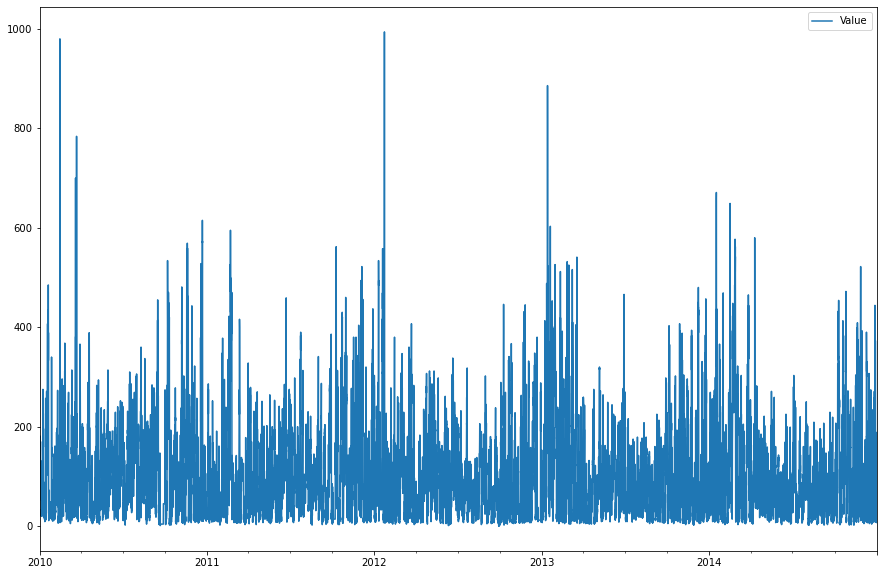

In [12]:
outlier_df.plot()
plt.show()

In [13]:
df = df[df['pm2.5'] <= 600]

In [14]:
df.corr()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,...,cbwd_NW,cbwd_SE,cbwd_cv,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
No,1.000000,0.979818,0.198630,0.017443,0.000583,-0.009528,0.046393,0.077008,-0.024573,-0.062673,...,-0.049740,0.003441,0.046090,-0.001547,0.000969,-0.000720,0.000232,0.000348,0.001537,-0.000821
year,0.979818,1.000000,-0.000573,-0.001077,0.000154,-0.006876,0.000151,0.044835,-0.013069,-0.064370,...,-0.057283,0.018440,0.035739,-0.001591,0.001134,-0.000343,-0.000066,-0.000297,0.001965,-0.000805
month,0.198630,-0.000573,1.000000,0.009206,-0.000582,-0.021266,0.232543,0.167881,-0.061513,0.002493,...,0.033033,-0.074110,0.055021,0.000177,-0.000454,-0.002072,0.001564,0.002934,-0.001961,-0.000184
day,0.017443,-0.001077,0.009206,1.000000,0.000052,0.081097,0.027328,0.013326,-0.006913,-0.009141,...,-0.015813,0.012951,0.007068,-0.001271,-0.002972,0.001566,-0.000919,0.003317,-0.000006,0.000291
hour,0.000583,0.000154,-0.000582,0.000052,1.000000,-0.023593,-0.021267,0.150029,-0.041671,0.056610,...,-0.128668,0.211654,-0.049844,-0.000443,-0.000358,0.000608,0.000118,-0.000198,-0.000090,0.000364
pm2.5,-0.009528,-0.006876,-0.021266,0.081097,-0.023593,1.000000,0.183443,-0.071875,-0.061710,-0.246062,...,-0.217611,0.102349,0.154341,0.020394,-0.005755,0.002157,-0.024296,0.011393,0.000094,-0.003966
DEWP,0.046393,0.000151,0.232543,0.027328,-0.021267,0.183443,1.000000,0.824458,-0.778787,-0.297034,...,-0.337411,0.277691,0.090747,0.011347,-0.002694,0.005878,-0.006259,0.008159,-0.009803,-0.006615
TEMP,0.077008,0.044835,0.167881,0.013326,0.150029,-0.071875,0.824458,1.000000,-0.827405,-0.155456,...,-0.269835,0.311418,-0.004584,0.003917,-0.002841,0.007058,-0.000654,-0.000602,-0.003640,-0.003239
PRES,-0.024573,-0.013069,-0.061513,-0.006913,-0.041671,-0.061710,-0.778787,-0.827405,1.000000,0.185625,...,0.229960,-0.250932,-0.021886,-0.003565,-0.008667,0.001900,0.010542,0.002011,-0.006070,0.003859
Iws,-0.062673,-0.064370,0.002493,-0.009141,0.056610,-0.246062,-0.297034,-0.155456,0.185625,1.000000,...,0.359283,-0.079936,-0.227016,-0.032067,0.003561,0.016999,-0.004025,-0.007715,0.018138,0.005088


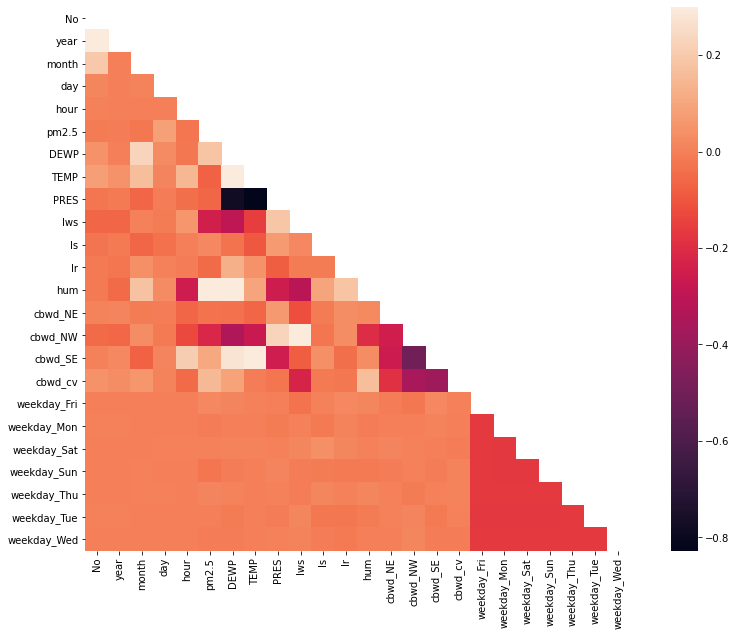

In [15]:
import seaborn as sns
data = df.corr()
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data, mask=mask, vmax=.3, square=True)

In [16]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,...,cbwd_NW,cbwd_SE,cbwd_cv,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
No,1.000000,0.979818,0.198630,0.017443,0.000583,-0.009528,0.046393,0.077008,-0.024573,-0.062673,...,-0.049740,0.003441,0.046090,-0.001547,0.000969,-0.000720,0.000232,0.000348,0.001537,-0.000821
year,0.979818,1.000000,-0.000573,-0.001077,0.000154,-0.006876,0.000151,0.044835,-0.013069,-0.064370,...,-0.057283,0.018440,0.035739,-0.001591,0.001134,-0.000343,-0.000066,-0.000297,0.001965,-0.000805
month,0.198630,-0.000573,1.000000,0.009206,-0.000582,-0.021266,0.232543,0.167881,-0.061513,0.002493,...,0.033033,-0.074110,0.055021,0.000177,-0.000454,-0.002072,0.001564,0.002934,-0.001961,-0.000184
day,0.017443,-0.001077,0.009206,1.000000,0.000052,0.081097,0.027328,0.013326,-0.006913,-0.009141,...,-0.015813,0.012951,0.007068,-0.001271,-0.002972,0.001566,-0.000919,0.003317,-0.000006,0.000291
hour,0.000583,0.000154,-0.000582,0.000052,1.000000,-0.023593,-0.021267,0.150029,-0.041671,0.056610,...,-0.128668,0.211654,-0.049844,-0.000443,-0.000358,0.000608,0.000118,-0.000198,-0.000090,0.000364
pm2.5,-0.009528,-0.006876,-0.021266,0.081097,-0.023593,1.000000,0.183443,-0.071875,-0.061710,-0.246062,...,-0.217611,0.102349,0.154341,0.020394,-0.005755,0.002157,-0.024296,0.011393,0.000094,-0.003966
DEWP,0.046393,0.000151,0.232543,0.027328,-0.021267,0.183443,1.000000,0.824458,-0.778787,-0.297034,...,-0.337411,0.277691,0.090747,0.011347,-0.002694,0.005878,-0.006259,0.008159,-0.009803,-0.006615
TEMP,0.077008,0.044835,0.167881,0.013326,0.150029,-0.071875,0.824458,1.000000,-0.827405,-0.155456,...,-0.269835,0.311418,-0.004584,0.003917,-0.002841,0.007058,-0.000654,-0.000602,-0.003640,-0.003239
PRES,-0.024573,-0.013069,-0.061513,-0.006913,-0.041671,-0.061710,-0.778787,-0.827405,1.000000,0.185625,...,0.229960,-0.250932,-0.021886,-0.003565,-0.008667,0.001900,0.010542,0.002011,-0.006070,0.003859
Iws,-0.062673,-0.064370,0.002493,-0.009141,0.056610,-0.246062,-0.297034,-0.155456,0.185625,1.000000,...,0.359283,-0.079936,-0.227016,-0.032067,0.003561,0.016999,-0.004025,-0.007715,0.018138,0.005088


In [17]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,...,cbwd_NW,cbwd_SE,cbwd_cv,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,...,0,1,0,1,0,0,0,0,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,...,0,1,0,1,0,0,0,0,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,...,0,1,0,1,0,0,0,0,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,...,0,1,0,1,0,0,0,0,0,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,...,1,0,0,0,0,0,0,0,1,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,...,1,0,0,0,0,0,0,0,1,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,...,1,0,0,0,0,0,0,0,1,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,...,1,0,0,0,0,0,0,0,1,0


## Add past data columns

In [60]:
need_shift = ['pm2.5', 'DEWP', 'TEMP', 'Iws']
for var in need_shift:
    for i in range(1, 5):
        key = var + '_' + str(i)
        df[key] = df[var].shift(periods=i)
df.dropna(inplace=True)

<ipython-input-60-5f52daef90b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[var].shift(periods=i)
<ipython-input-60-5f52daef90b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [19]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'hum', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'pm2.5_1', 'pm2.5_2',
       'TEMP_1', 'TEMP_2', 'Iws_1', 'Iws_2'],
      dtype='object')

In [20]:
features_1 = list(df.columns[9:])
predicts = list(df.columns[5:8])

In [21]:
print(features_1)

['Iws', 'Is', 'Ir', 'hum', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'pm2.5_1', 'pm2.5_2', 'TEMP_1', 'TEMP_2', 'Iws_1', 'Iws_2']


In [22]:
X = df[features_1]
y = df[predicts].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/5)

In [23]:
def cal_error(model, X, y):
    predict = model.predict(X)
    data = [0] * 3
    for i in range(len(predict)):
        for j in range(3):
            data[j] += abs(predict[i][j] - y[i][j])
    for i in range(3):
        data[i] /= len(predict)
    return (data[0], data[1], data[2])

In [24]:
def score_model(model, X, y):
    predict = model.predict(X)
    print('R^2 score:', r2_score(predict, y))
    print('Mean Absolute Error:', mean_absolute_error(predict, y))
    print('Error model:', cal_error(model, X, y))

In [25]:
def important_features(model, features):
    foo = pd.Series(model.feature_importances_, index=features)
    foo.nlargest(100).plot(kind='barh')
    plt.style.use('ggplot')
    plt.show()

## Modeling

In [26]:
random_forest = RandomForestRegressor() 
random_forest.fit(Xtrain, ytrain)
random_forest.score(Xtrain, ytrain)

0.9953606759611681

In [27]:
score_model(random_forest, Xtest, ytest)

R^2 score: 0.9647207558229346
Mean Absolute Error: 5.054845576754524
Error model: (12.459802353478805, 1.4044167713926694, 1.3003176053920988)


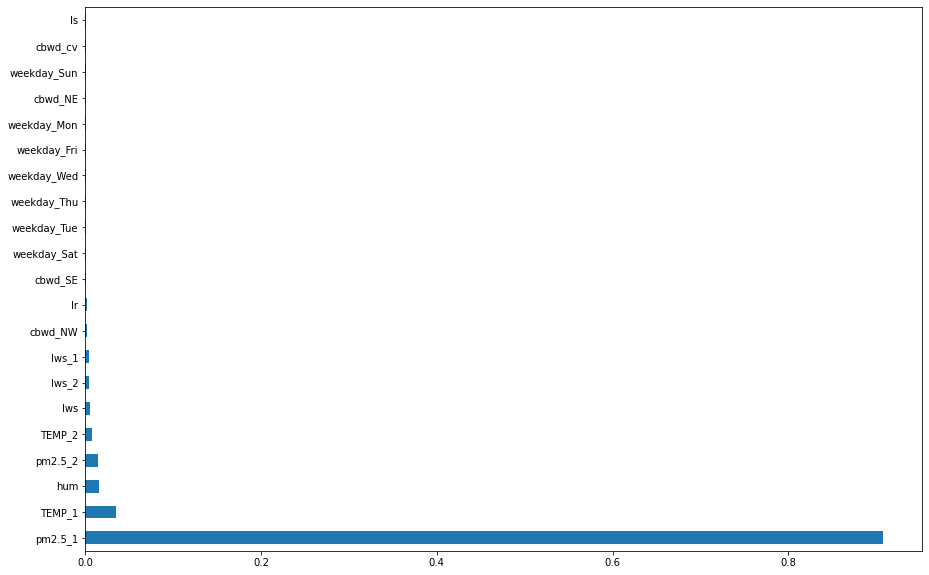

In [28]:
important_features(random_forest, features_1)

In [29]:
remove_list = ['cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'weekday_Fri', 
                 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 
                'weekday_Tue', 'weekday_Wed']
features_2 = [i for i in features_1 if i not in remove_list]

In [30]:
X = df[features_2]
y = df[predicts].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/5)

In [31]:
random_forest_2 = RandomForestRegressor()
random_forest_2.fit(Xtrain, ytrain)
random_forest_2.score(Xtrain, ytrain)

0.9954857036617447

In [32]:
score_model(random_forest_2, Xtest, ytest)

R^2 score: 0.9650075956925956
Mean Absolute Error: 5.0175395102631075
Error model: (12.443719867473973, 1.3465543242316897, 1.26234433908366)


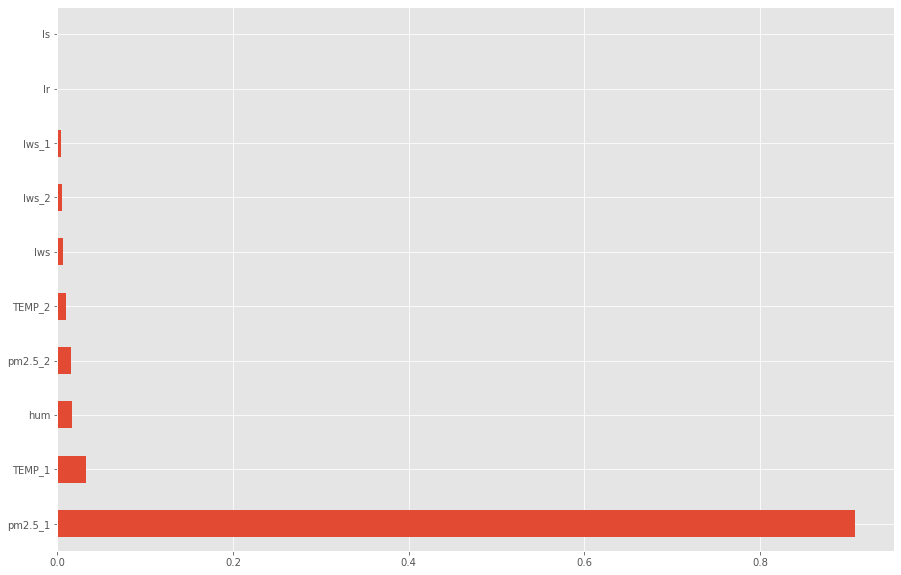

In [33]:
important_features(random_forest_2, features_2)

In [41]:
remove_list = ['Iws_2', 'Iws_1', 'Is', 'Ir', 'Iws']
features_3 = [i for i in features_2 if i not in remove_list]

In [42]:
X = df[features_3]
y = df[predicts].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/5)

In [43]:
random_forest_3 = RandomForestRegressor()
random_forest_3.fit(Xtrain, ytrain)
random_forest_3.score(Xtrain, ytrain)

0.9954628770087042

In [44]:
score_model(random_forest_3, Xtest, ytest)

R^2 score: 0.965348506466118
Mean Absolute Error: 5.125219987463087
Error model: (12.898279564920205, 1.252320592123514, 1.2250598053455404)


In [47]:
features_3

['hum', 'pm2.5_1', 'pm2.5_2', 'TEMP_1', 'TEMP_2']

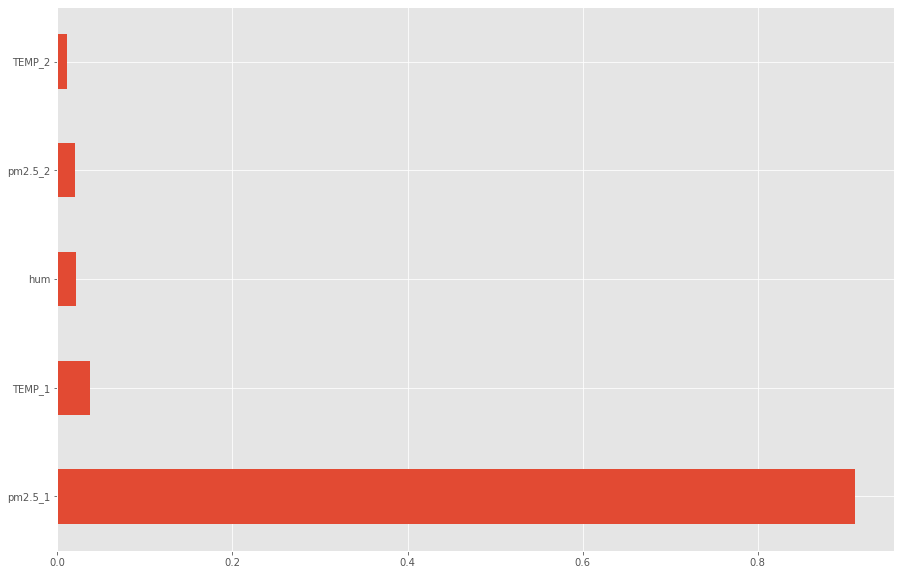

In [45]:
important_features(random_forest_3, features_3)

In [67]:
features_4 = ['pm2.5_1', 'pm2.5_2', 'TEMP_1', 'DEWP_1', 'Iws', 'hum']
X = df[features_4]
y = df[predicts].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/5)

In [68]:
random_forest_4 = RandomForestRegressor()
random_forest_4.fit(Xtrain, ytrain)
random_forest_4.score(Xtrain, ytrain)

0.9961202627200662

## Predict for next 6 hours

In [39]:
# for i in range(6):
#     tail = pd.concat([df.tail(1)], ignore_index=True)
#     tail.loc[:, ['day', 'month', 'year', 'hour']] = [1, 1, 2015, i]
#     df = pd.concat([df, tail], ignore_index=True)
#     df.loc[len(df) - 1:, predicts] = random_forest_3.predict(tail[features_3])
#     for var in need_shift:
#         for i in range(1, 3):
#             key = var + '_' + str(i)
#             df[key] = df[var].shift(periods=i)

In [40]:
# df.tail(6)[['day', 'month', 'year', 'hour'] + predicts]

- season
- trend
- statistical models for time serries
- how data transform by times (up or down, low or high)
- past data for weekdays or for pm2.5 last year
- k fold cross validation for time series